# Read and segment original MSL file to derivatives (BIDS)

A partir de la estructura BIDS base, se lee el archivo original completo correspondiente a la tarea MSL, y se obtienen segmentos correspondientes a los peridios de baseline y los periodos Rest/Task de las distintas versiones de la tarea (secuencia y control). Estos segmentos se guardan en la estrucutra derivatives siguiendo BIDS.

In [1]:
%matplotlib qt5

In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import mne_bids 
import mne_bids.utils 

Se indica la ruta del proyecto base con los datos organizados en formato BIDS

In [3]:
bids_root = '/home/lfa-01/Documentos/Datos_Proyecto_LFA-ENYS_BIDS'
mne_bids.print_dir_tree(bids_root, max_depth=4)

|Datos_Proyecto_LFA-ENYS_BIDS/
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-04/
|------ ses-day1/
|--------- sub-04_ses-day1_scans.tsv
|--------- ieeg/
|------------ sub-04_ses-day1_task-msl_channels.tsv
|------------ sub-04_ses-day1_task-msl_events.tsv
|------------ sub-04_ses-day1_task-msl_ieeg.edf
|------------ sub-04_ses-day1_task-msl_ieeg.json
|------------ sub-04_ses-day1_task-vma_channels.tsv
|------------ sub-04_ses-day1_task-vma_events.tsv
|------------ sub-04_ses-day1_task-vma_ieeg.edf
|------------ sub-04_ses-day1_task-vma_ieeg.json
|--- sub-05/
|------ ses-day1/
|--------- ieeg/
|--- sub-06/
|------ ses-day1/
|--------- sub-06_ses-day1_scans.tsv
|--------- ieeg/
|------------ sub-06_ses-day1_task-msl_channels.tsv
|------------ sub-06_ses-day1_task-msl_events.tsv
|------------ sub-06_ses-day1_task-msl_ieeg.edf
|------------ sub-06_ses-day1_task-msl_ieeg.json
|------------ sub-06_ses-day1_task-vma_channels.tsv
|------------ s

Se indica informacion especifica para ubicar a un sujeto y tarea particular

In [4]:
session = 'day1'
datatype = 'ieeg'
subjects = mne_bids.get_entity_vals(bids_root, 'subject')
tasks = mne_bids.get_entity_vals(bids_root, 'task')
suffix = 'ieeg'

print(mne_bids.get_entity_vals(bids_root, 'subject'))
print(mne_bids.get_entity_vals(bids_root, 'task'))
print(mne_bids.get_entity_vals(bids_root, 'session'))
print(mne_bids.get_entity_vals(bids_root, 'run'))

['04', '06', '07']
['msl', 'vma']
['day1']
[]


Creacion del BIDS path

In [5]:
idx_sub = 0 # Indice del sujeto analizado
idx_task = 0 # Indice de la tarea

bids_path = mne_bids.BIDSPath(root=bids_root, subject = subjects[idx_sub], task = tasks[idx_task], session=session, suffix=suffix, datatype=datatype)
print(bids_path.match(ignore_json=True))

[BIDSPath(
root: /home/lfa-01/Documentos/Datos_Proyecto_LFA-ENYS_BIDS
datatype: ieeg
basename: sub-04_ses-day1_task-msl_ieeg.edf)]


Se lee el archivo .edf especificado como un objeto MNE

In [6]:
raw_mne = mne_bids.read_raw_bids(bids_path=bids_path, verbose=False)

/tmp/ipykernel_32596/2145917791.py:1: RuntimeWarning: Did not find any electrodes.tsv associated with sub-04_ses-day1_task-msl.

The search_str was "/home/lfa-01/Documentos/Datos_Proyecto_LFA-ENYS_BIDS/sub-04/**/ieeg/sub-04_ses-day1*electrodes.tsv"
  raw_mne = mne_bids.read_raw_bids(bids_path=bids_path, verbose=False)
/tmp/ipykernel_32596/2145917791.py:1: RuntimeWarning: Did not find any coordsystem.json associated with sub-04_ses-day1_task-msl.

The search_str was "/home/lfa-01/Documentos/Datos_Proyecto_LFA-ENYS_BIDS/sub-04/**/ieeg/sub-04_ses-day1*coordsystem.json"
  raw_mne = mne_bids.read_raw_bids(bids_path=bids_path, verbose=False)


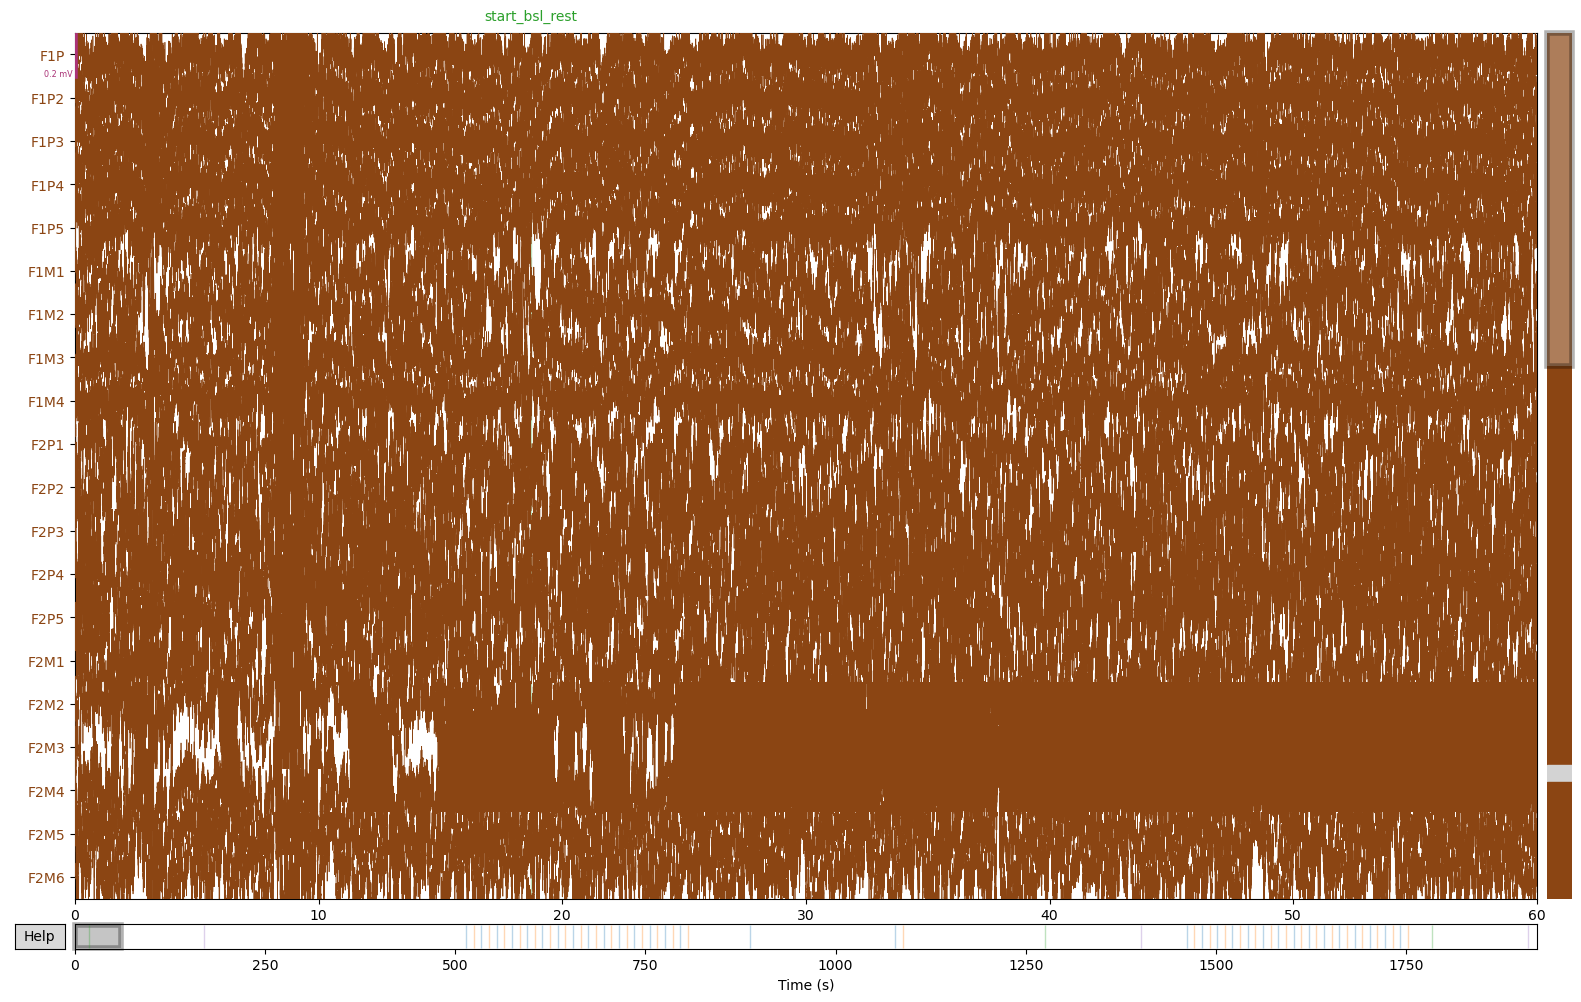

In [23]:
raw_mne.plot(start=0, duration=60,show_scrollbars=True)

In [7]:
print(type(raw_mne))
print(raw_mne.info)
print(raw_mne.annotations)
print(len(raw_mne))

<class 'mne.io.edf.edf.RawEDF'>
<Info | 9 non-empty values
 bads: 1 items (HIP3)
 ch_names: F1P, F1P2, F1P3, F1P4, F1P5, F1M1, F1M2, F1M3, F1M4, F2P1, F2P2, ...
 chs: 52 sEEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 1000.0 Hz
 meas_date: 2023-03-22 10:23:41 UTC
 nchan: 52
 projs: []
 sfreq: 2000.0 Hz
 subject_info: 3 items (dict)
>
<Annotations | 69 segments: inicio_msl_rest (32), inicio_msl_task (31), ...>
3844000


Se extraen los eventos del registro

In [11]:
events_id = {'start_bsl_rest': 64, 'stop_bsl_rest': 128, 'inicio_msl_rest': 4, 'inicio_msl_task': 16}
events_from_annot, event_dict = mne.events_from_annotations(raw_mne, event_id=events_id)
print(event_dict)
print(events_from_annot)
print(events_from_annot[:10])
print(events_from_annot[63])

Used Annotations descriptions: ['inicio_msl_rest', 'inicio_msl_task', 'start_bsl_rest', 'stop_bsl_rest']
{'inicio_msl_rest': 4, 'inicio_msl_task': 16, 'start_bsl_rest': 64, 'stop_bsl_rest': 128}
[[  37452       0      64]
 [ 339329       0     128]
 [1028256       0       4]
 [1048398       0      16]
 [1068668       0       4]
 [1088740       0      16]
 [1108903       0       4]
 [1128945       0      16]
 [1149117       0       4]
 [1169161       0      16]
 [1189337       0       4]
 [1209399       0      16]
 [1229545       0       4]
 [1249587       0      16]
 [1269745       0       4]
 [1289801       0      16]
 [1310003       0       4]
 [1330071       0      16]
 [1350271       0       4]
 [1370317       0      16]
 [1390529       0       4]
 [1410595       0      16]
 [1430779       0       4]
 [1450851       0      16]
 [1471045       0       4]
 [1491087       0      16]
 [1511273       0       4]
 [1531341       0      16]
 [1551551       0       4]
 [1571618       0     

Una vez obtenidos las coordenadas de todas las anotaciones/eventos es posible seleccionar las que correspondan y obtener segmentos de señal

In [9]:
# Se obtienen los indices que corresponden a los eventos de los periodos de baseline/rest. Indices asociados a la matriz 'events_from_annot'
bsl_indx = np.where((events_from_annot[:,2]==64) | (events_from_annot[:,2]==128))[0]
print(bsl_indx)

[ 0  1 35 36 67 68]


Se guardan cada uno de los segmentos de baseline/rest en un directorio de derivatives

In [10]:
#Ruta de los daros Derivatives
deriv_bids_root = '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS'

# Se genera el path para guardar el archivo
deriv_bids_path = mne_bids.BIDSPath(root=deriv_bids_root, subject = subjects[idx_sub], task = tasks[idx_task], session=session, suffix=suffix, datatype=datatype)
print(deriv_bids_path)

/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/sub-04/ses-day1/ieeg/sub-04_ses-day1_task-msl_ieeg


In [16]:
desc_posible_bsl = ['baselineSegm1', 'baselineSegm2', 'baselineSegm3']
# IMPORTANTE: para cada segmento generado hay que cambiar este nombre
description = desc_posible_bsl[2]

deriv_bids_path.update(description=description)

print(deriv_bids_path)

# IMPORTANTE: esto se tiene que ir variando para indica el indice de inicio y final de cada evento/anotacion asociada a cada segmentos a cortar
indx_inicial = 4
indx_final = 5
#----

print(events_from_annot[bsl_indx[indx_inicial],0])
print(events_from_annot[bsl_indx[indx_final],0])

/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/sub-04/ses-day1/ieeg/sub-04_ses-day1_task-msl_desc-baselineSegm3_ieeg
3569452
3820062


In [19]:
#Segmento a partir de la data raw
segments_raw_mne = raw_mne.copy().crop(tmin = events_from_annot[bsl_indx[indx_inicial],0]/raw_mne.info['sfreq'], tmax = (events_from_annot[bsl_indx[indx_final],0]+1)/raw_mne.info['sfreq'], include_tmax=True, verbose = True)

#Gardar el archivo tipo .edf siguiendo el formato BIDS
mne_bids.write_raw_bids(segments_raw_mne, deriv_bids_path, format='EDF', symlink=False, empty_room=None, 
        allow_preload=True, overwrite=True, verbose=True) 

Writing '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/participants.tsv'...
Writing '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/participants.json'...
The provided raw data contains annotations, but you did not pass an "event_id" mapping from annotation descriptions to event codes. We will generate arbitrary event codes. To specify custom event codes, please pass "event_id".
Used Annotations descriptions: ['start_bsl_rest', 'stop_bsl_rest']
Writing '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/sub-04/ses-day1/ieeg/sub-04_ses-day1_task-msl_desc-baselineSegm3_events.tsv'...
Writing '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/dataset_description.json'...
Writing '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/sub-04/ses-day1/ieeg/sub-04_ses-day1_task-msl_desc-baselineSegm3_ieeg.json'...
Writing '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/sub-04/ses-day1/ieeg/sub-04_ses-day1_task-msl_desc-baselineSegm3_ch

/tmp/ipykernel_32596/941469004.py:5: RuntimeWarning: Converting data files to EDF format
  mne_bids.write_raw_bids(segments_raw_mne, deriv_bids_path, format='EDF', symlink=False, empty_room=None,


Writing '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/sub-04/ses-day1/sub-04_ses-day1_scans.tsv'...
Wrote /home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/sub-04/ses-day1/sub-04_ses-day1_scans.tsv entry with ieeg/sub-04_ses-day1_task-msl_desc-baselineSegm3_ieeg.edf.


/tmp/ipykernel_32596/941469004.py:5: RuntimeWarning: EDF format requires equal-length data blocks, so 0.694 seconds of zeros were appended to all channels when writing the final block.
  mne_bids.write_raw_bids(segments_raw_mne, deriv_bids_path, format='EDF', symlink=False, empty_room=None,


BIDSPath(
root: /home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS
datatype: ieeg
basename: sub-04_ses-day1_task-msl_desc-baselineSegm3_ieeg.edf)

In [21]:
del segments_raw_mne

Using matplotlib as 2D backend.


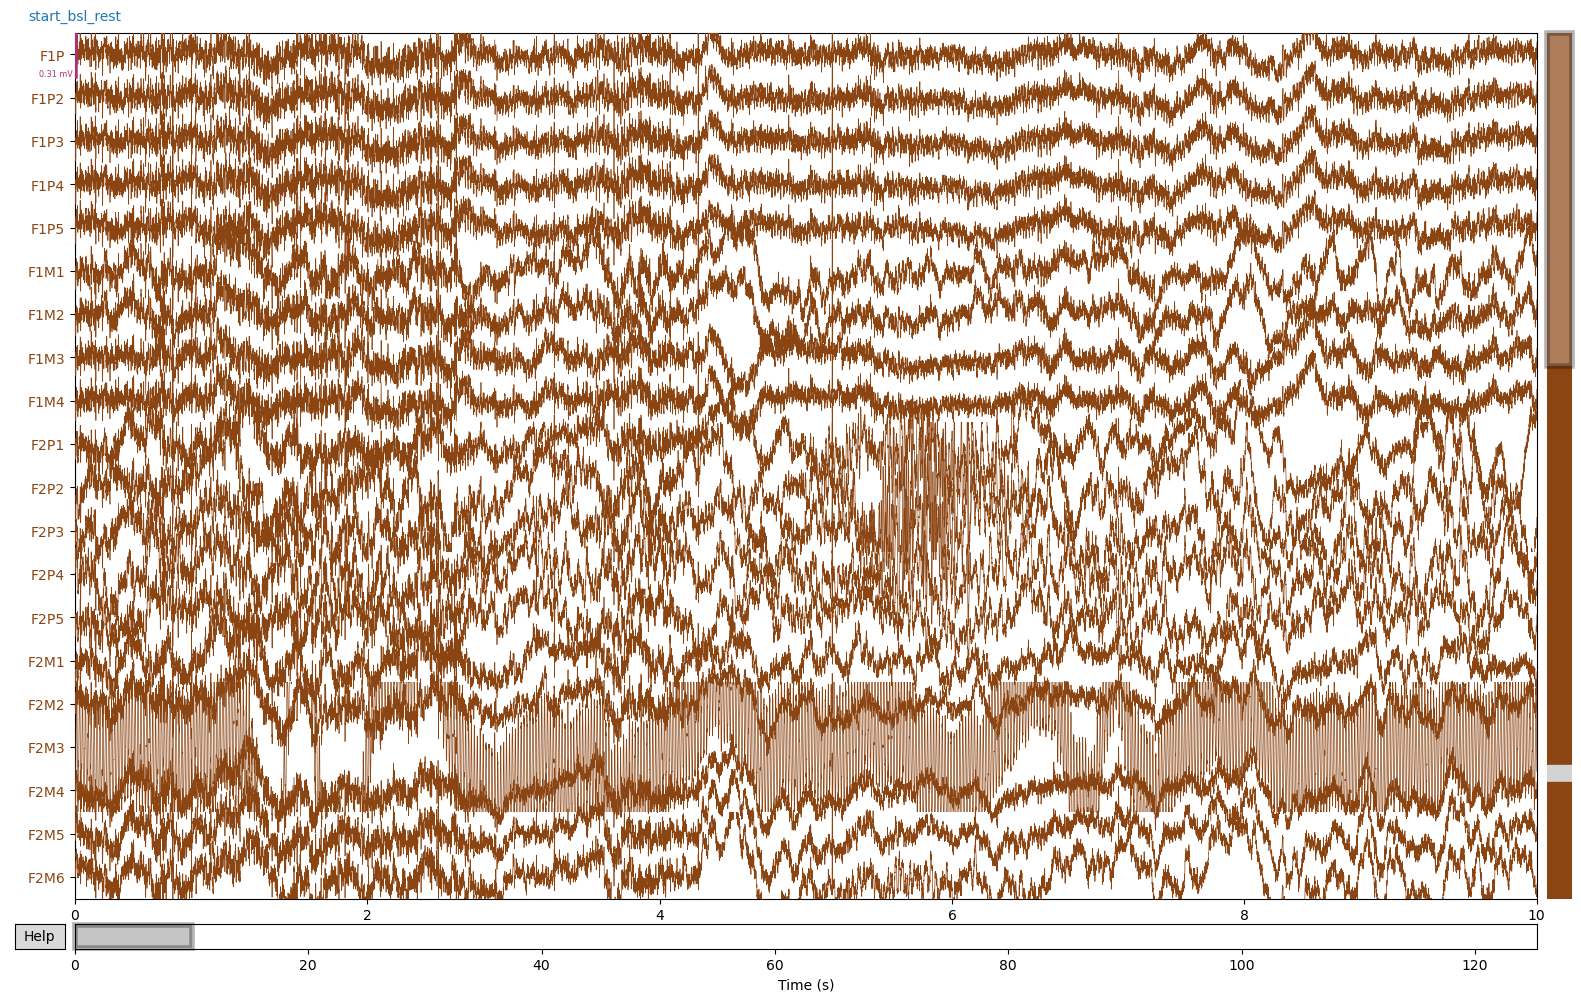

Channels marked as bad:
['HIP3']


In [20]:
segments_raw_mne.plot(scalings='auto')

-------------------------------------------

### Para segmentar los registros correspondientes a las versiones secuencia/control de MSL 

Se obtienen los indices que corresponden a los eventos de los periodos de task/rest. Indices asociados a la matriz 'events_from_annot'

In [25]:
# Se obtienen los indices que corresponden a los eventos de los periodos de task/rest. Indices asociados a la matriz 'events_from_annot'
task_rest_indx = np.where((events_from_annot[:,2]==4) | (events_from_annot[:,2]==16))[0]
print(task_rest_indx)
print(len(task_rest_indx))
print(task_rest_indx[0],task_rest_indx[29],task_rest_indx[33],task_rest_indx[62])


[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]
63
2 31 37 66


In [32]:
# IMPORTANTE: para cada segmento generado hay que cambiar este nombre
# NOTA: para ponerle nombre hay que determinar que segmentos corresponde a la tarea control y cual a la secuencia
# posibles: ctrTask , secTask
desc_posible_task = ['ctrTask','secTask']
# HAY QUE MODIFICAR ACA EL NOMBRE DEL ARCHIVO SEGUN CORRESPONDA
description = desc_posible_task[1]
deriv_bids_path.update(description=description)

print(deriv_bids_path)

# IMPORTANTE: esto se tiene que ir variando para indica el indice de inicio y final de cada evento/anotacion asociada a cada segmentos a cortar
indx_inicial = 33#0# 
indx_final = 62#29#
#----

print(events_from_annot[task_rest_indx[indx_inicial],0])
print(events_from_annot[task_rest_indx[indx_final],0])

/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/sub-04/ses-day1/ieeg/sub-04_ses-day1_task-msl_desc-secTask_ieeg
2923292
3505062


In [36]:
#Segmento a partir de la data raw
additional_samples = int(10*2000) #para agregar 10 segundos despues del ultimo evento
segments_raw_mne = raw_mne.copy().crop(tmin = events_from_annot[task_rest_indx[indx_inicial],0]/raw_mne.info['sfreq'], tmax = (events_from_annot[task_rest_indx[indx_final],0]+1+additional_samples)/raw_mne.info['sfreq'], include_tmax=True, verbose = True)

#Gardar el archivo tipo .edf siguiendo el formato BIDS
mne_bids.write_raw_bids(segments_raw_mne, deriv_bids_path, format='EDF', symlink=False, empty_room=None, 
        allow_preload=True, overwrite=True, verbose=True)

Writing '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/participants.tsv'...
Writing '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/participants.json'...
The provided raw data contains annotations, but you did not pass an "event_id" mapping from annotation descriptions to event codes. We will generate arbitrary event codes. To specify custom event codes, please pass "event_id".
Used Annotations descriptions: ['inicio_msl_rest', 'inicio_msl_task']
Writing '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/sub-04/ses-day1/ieeg/sub-04_ses-day1_task-msl_desc-secTask_events.tsv'...
Writing '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/dataset_description.json'...
Writing '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/sub-04/ses-day1/ieeg/sub-04_ses-day1_task-msl_desc-secTask_ieeg.json'...
Writing '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/sub-04/ses-day1/ieeg/sub-04_ses-day1_task-msl_desc-secTask_channels.tsv'...


/tmp/ipykernel_32596/457059340.py:6: RuntimeWarning: Converting data files to EDF format
  mne_bids.write_raw_bids(segments_raw_mne, deriv_bids_path, format='EDF', symlink=False, empty_room=None,


Writing '/home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/sub-04/ses-day1/sub-04_ses-day1_scans.tsv'...
Wrote /home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS/sub-04/ses-day1/sub-04_ses-day1_scans.tsv entry with ieeg/sub-04_ses-day1_task-msl_desc-secTask_ieeg.edf.


/tmp/ipykernel_32596/457059340.py:6: RuntimeWarning: EDF format requires equal-length data blocks, so 0.114 seconds of zeros were appended to all channels when writing the final block.
  mne_bids.write_raw_bids(segments_raw_mne, deriv_bids_path, format='EDF', symlink=False, empty_room=None,


BIDSPath(
root: /home/lfa-01/Documentos/Derivatives_Proyecto_LFA-ENYS_BIDS
datatype: ieeg
basename: sub-04_ses-day1_task-msl_desc-secTask_ieeg.edf)

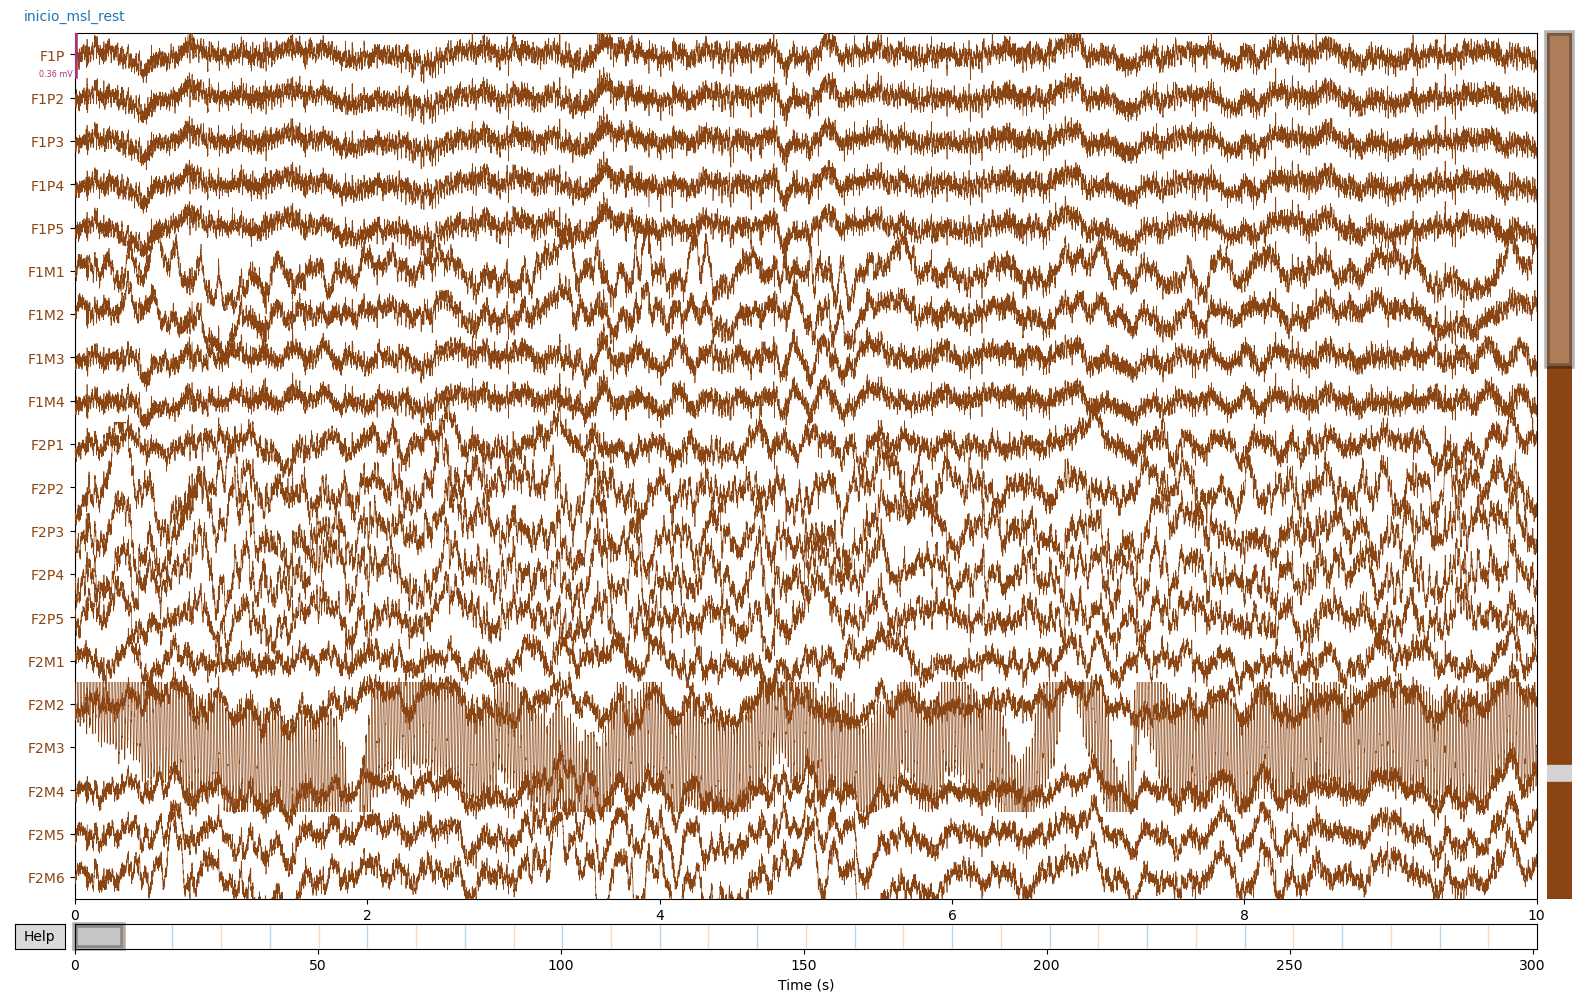

Channels marked as bad:
['HIP3']


In [34]:
segments_raw_mne.plot(scalings='auto')

In [37]:
del segments_raw_mne 